In [1]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt
import matplotlib.pyplot as plt

it = nt.int32
ft = nt.float32
tt = nt.UniTuple
ip = np.int32
fp = np.float32
dt = nt.uint32 
ndt = np.uint32

In [2]:
%matplotlib inline

# Load data

In [3]:
adata = sq.datasets.seqfish()

In [4]:
adata.obs

Area         celltype_mapped_refined
embryo1_Pos0_cell10_z2   10400                     Low quality
embryo1_Pos0_cell10_z5    2256          Lateral plate mesoderm
embryo1_Pos0_cell100_z2   8144                       Erythroid
embryo1_Pos0_cell100_z5   6592          Lateral plate mesoderm
embryo1_Pos0_cell101_z2   8560                       Erythroid
...                        ...                             ...
embryo1_Pos28_cell97_z2   7552                     Spinal cord
embryo1_Pos28_cell97_z5   3408                     Endothelium
embryo1_Pos28_cell98_z2  12704                     Spinal cord
embryo1_Pos28_cell98_z5  11376  Haematoendothelial progenitors
embryo1_Pos28_cell99_z5   5392                     Spinal cord

[19416 rows x 2 columns]

In [5]:
np.unique(adata.obs["celltype_mapped_refined"], return_counts=True)

(array(['Allantois', 'Anterior somitic tissues', 'Cardiomyocytes',
        'Cranial mesoderm', 'Definitive endoderm', 'Dermomyotome',
        'Endothelium', 'Erythroid', 'Forebrain/Midbrain/Hindbrain',
        'Gut tube', 'Haematoendothelial progenitors',
        'Intermediate mesoderm', 'Lateral plate mesoderm', 'Low quality',
        'Mixed mesenchymal mesoderm', 'NMP', 'Neural crest',
        'Presomitic mesoderm', 'Sclerotome', 'Spinal cord',
        'Splanchnic mesoderm', 'Surface ectoderm'], dtype=object),
 array([  77,  112,  737,  528,  213,  523,  953,  300, 3704, 1464,  637,
         623, 1243, 1645,  541,  109,  912,  458,   78, 2620, 1138,  801]))

Allantois
0
Anterior somitic tissues
1
Cardiomyocytes
2
Cranial mesoderm
3
Definitive endoderm
4
Dermomyotome
5
Endothelium
6
Erythroid
7
Forebrain/Midbrain/Hindbrain
8


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm'

Gut tube
9
Haematoendothelial progenitors
10
Intermediate mesoderm
11
Lateral plate mesoderm
12
Low quality
13
Mixed mesenchymal mesoderm
14
NMP
15
Neural crest
16


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm'

Presomitic mesoderm
17
Sclerotome
18
Spinal cord
19
Splanchnic mesoderm
20
Surface ectoderm
21
['Allantois', 'Anterior somitic tissues', 'Cardiomyocytes', 'Cranial mesoderm', 'Definitive endoderm', 'Dermomyotome', 'Endothelium', 'Erythroid', 'Forebrain/Midbrain/Hindbrain', 'Gut tube', 'Haematoendothelial progenitors', 'Intermediate mesoderm', 'Lateral plate mesoderm', 'Low quality', 'Mixed mesenchymal mesoderm', 'NMP', 'Neural crest', 'Presomitic mesoderm', 'Sclerotome', 'Spinal cord', 'Splanchnic mesoderm', 'Surface ectoderm']
22


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm'

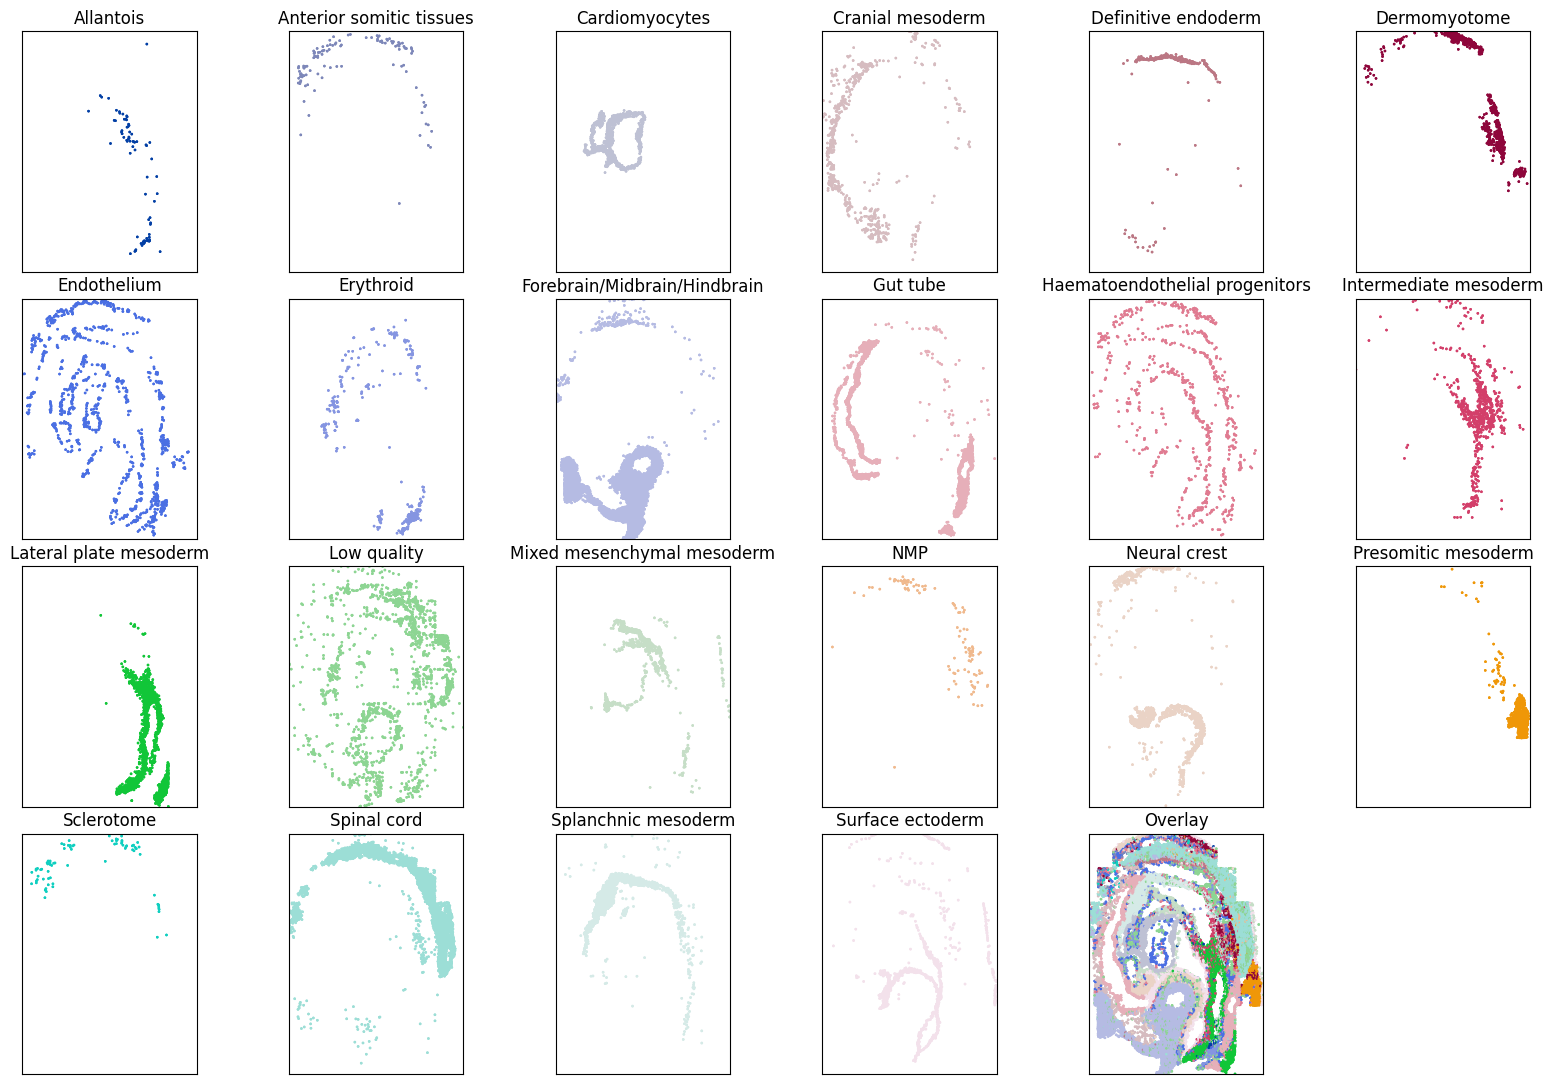

In [6]:
ncol = 6
nrow = 6
cts = list(np.unique(adata.obs["celltype_mapped_refined"]))
cts.append(list(np.unique(adata.obs["celltype_mapped_refined"])))

fig = plt.figure(figsize=(16,16))

for index, ct in enumerate(cts):
    print(ct)
    print(index)
    if index == 22:
        title = "Overlay"
    else:
        title = ct 
    ax = fig.add_subplot(nrow, ncol, index+1)
    sq.pl.spatial_scatter(
        adata,
        shape=None,
        color = "celltype_mapped_refined",
        groups = ct,
        size=3,
        ax = ax,
        legend_loc=False
    )
    ax.set_title(label = title, size=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([np.min(adata.obsm["spatial"], axis = 0)[0], np.max(adata.obsm["spatial"], axis = 0)[0]])
    ax.set_ylim([np.min(adata.obsm["spatial"], axis = 0)[1], np.max(adata.obsm["spatial"], axis = 0)[1]])

fig.tight_layout(pad=0)
# plt.savefig("/Users/brendan/Desktop/seqfish.png")

# Save data

In [7]:
df = pd.DataFrame(adata.obsm['spatial'])

In [8]:
df.rename(columns = {0:"x", 1:"y"}, inplace=True)

In [9]:
df["cluster"] = adata.obs["celltype_mapped_refined"].values
df

x         y                         cluster
0      0.729261 -2.821746                     Low quality
1      0.708437 -2.707126          Lateral plate mesoderm
2      0.961726 -2.943951                       Erythroid
3      0.976304 -2.517971          Lateral plate mesoderm
4      0.959880 -3.000712                       Erythroid
...         ...       ...                             ...
19411 -1.538899  2.664242                     Spinal cord
19412 -1.399228  3.176193                     Endothelium
19413 -1.513958  2.625459                     Spinal cord
19414 -1.389354  3.134951  Haematoendothelial progenitors
19415 -1.394992  2.581272                     Spinal cord

[19416 rows x 3 columns]

In [30]:
df.x.min()

-2.5493682364864583

In [31]:
df.x.max()

2.520293708124292

In [32]:
df.y.min()

-3.4920842294172303

In [33]:
df.y.max()

3.4920842294172374

In [34]:
df['x'] = df['x'] + abs(df.x.min())

In [35]:
df.x.min()

0.0

In [36]:
df.x.max()

5.0696619446107505

In [38]:
df['y'] = df['y'] + abs(df.y.min())

In [39]:
df.y.min()

0.0

In [40]:
df.y.max()

6.984168458834468

In [10]:
df['x'] = df['x'] * 1000
df['y'] = df['y'] * 1000

In [11]:
df

x            y                         cluster
0       729.260730 -2821.745782                     Low quality
1       708.436879 -2707.126306          Lateral plate mesoderm
2       961.726024 -2943.950815                       Erythroid
3       976.304349 -2517.971233          Lateral plate mesoderm
4       959.879579 -3000.711791                       Erythroid
...            ...          ...                             ...
19411 -1538.899148  2664.241959                     Spinal cord
19412 -1399.227981  3176.192863                     Endothelium
19413 -1513.957947  2625.458778                     Spinal cord
19414 -1389.353520  3134.950823  Haematoendothelial progenitors
19415 -1394.992278  2581.271794                     Spinal cord

[19416 rows x 3 columns]

In [13]:
df.to_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/seqfish/seqfish.meta.csv")

# Co-occurance

recall that `adata` is the original loaded dataset, so the coordinates are still in the original scale. Later, can multiply the intervals to match the micron scale.

In [15]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:41<00:00, 41.72s/]


In [16]:
adata.uns

OverloadedDict, wrapping:
	{'celltype_mapped_refined_colors': array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb'], dtype=object), 'celltype_mapped_refined_co_occurrence': {'occ': array([[[23.67735   , 14.624799  , 12.864976  , ...,  1.3779362 ,
          1.1078023 ,  1.3841454 ],
        [ 0.        ,  0.13932632,  0.10025242, ...,  1.913578  ,
          1.8343636 ,  1.6490873 ],
        [ 0.1880926 ,  0.5237129 ,  0.45273814, ...,  0.6360733 ,
          0.6441512 ,  0.6082954 ],
        ...,
        [ 0.04631314,  0.05771634,  0.05929497, ...,  0.8971881 ,
          0.83220834,  0.74986714],
        [ 0.3401432 ,  0.2675171 ,  0.18571258, ...,  0.28579244,
          0.30519766,  0.34307528],
        [ 0.8870157 ,  0.9692143 ,  0.9197847 , ...,  0.56735736,
          0.54

In [18]:
## get the co-occurance values
occ = adata.uns["celltype_mapped_refined_co_occurrence"]["occ"]
occ

array([[[23.67735   , 14.624799  , 12.864976  , ...,  1.3779362 ,
          1.1078023 ,  1.3841454 ],
        [ 0.        ,  0.13932632,  0.10025242, ...,  1.913578  ,
          1.8343636 ,  1.6490873 ],
        [ 0.1880926 ,  0.5237129 ,  0.45273814, ...,  0.6360733 ,
          0.6441512 ,  0.6082954 ],
        ...,
        [ 0.04631314,  0.05771634,  0.05929497, ...,  0.8971881 ,
          0.83220834,  0.74986714],
        [ 0.3401432 ,  0.2675171 ,  0.18571258, ...,  0.28579244,
          0.30519766,  0.34307528],
        [ 0.8870157 ,  0.9692143 ,  0.9197847 , ...,  0.56735736,
          0.54488415,  0.5597769 ]],

       [[ 0.        ,  0.13932632,  0.10025241, ...,  1.9135782 ,
          1.8343636 ,  1.6490875 ],
        [16.44703   , 15.012015  , 11.594283  , ...,  1.5689025 ,
          1.6425258 ,  1.190804  ],
        [ 0.        ,  0.        ,  0.        , ...,  1.6989919 ,
          1.5497024 ,  1.3965368 ],
        ...,
        [ 0.31509295,  0.79057044,  1.4374534 , ...,  

In [19]:
## get the intervals
intervals = adata.uns["celltype_mapped_refined_co_occurrence"]["interval"]
intervals

array([0.04813954, 0.11296997, 0.1778004 , 0.24263084, 0.30746126,
       0.37229168, 0.43712214, 0.5019525 , 0.566783  , 0.63161343,
       0.69644386, 0.7612743 , 0.8261047 , 0.8909351 , 0.95576555,
       1.020596  , 1.0854264 , 1.1502569 , 1.2150873 , 1.2799177 ,
       1.3447481 , 1.4095786 , 1.474409  , 1.5392394 , 1.6040698 ,
       1.6689003 , 1.7337307 , 1.7985612 , 1.8633916 , 1.9282221 ,
       1.9930525 , 2.0578828 , 2.1227133 , 2.1875436 , 2.2523742 ,
       2.3172047 , 2.382035  , 2.4468656 , 2.5116959 , 2.5765264 ,
       2.6413567 , 2.7061872 , 2.7710176 , 2.835848  , 2.9006784 ,
       2.965509  , 3.0303392 , 3.0951698 , 3.16      , 3.2248306 ],
      dtype=float32)

In [20]:
%load_ext rpy2.ipython

In [21]:
%R -i occ ## load in occ as an R object with same name
%R saveRDS(occ, "/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/seqfish/sp.seqfish.co_occurance_array.rds") ## save it as an rds fi

In [22]:
%R -i intervals ## load in occ as an R object with same name
%R saveRDS(intervals, "/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/slideseq/sp.seqfish.co_occurance_intervals.rds") ## save it as an rds file

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_graph.py:367: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(


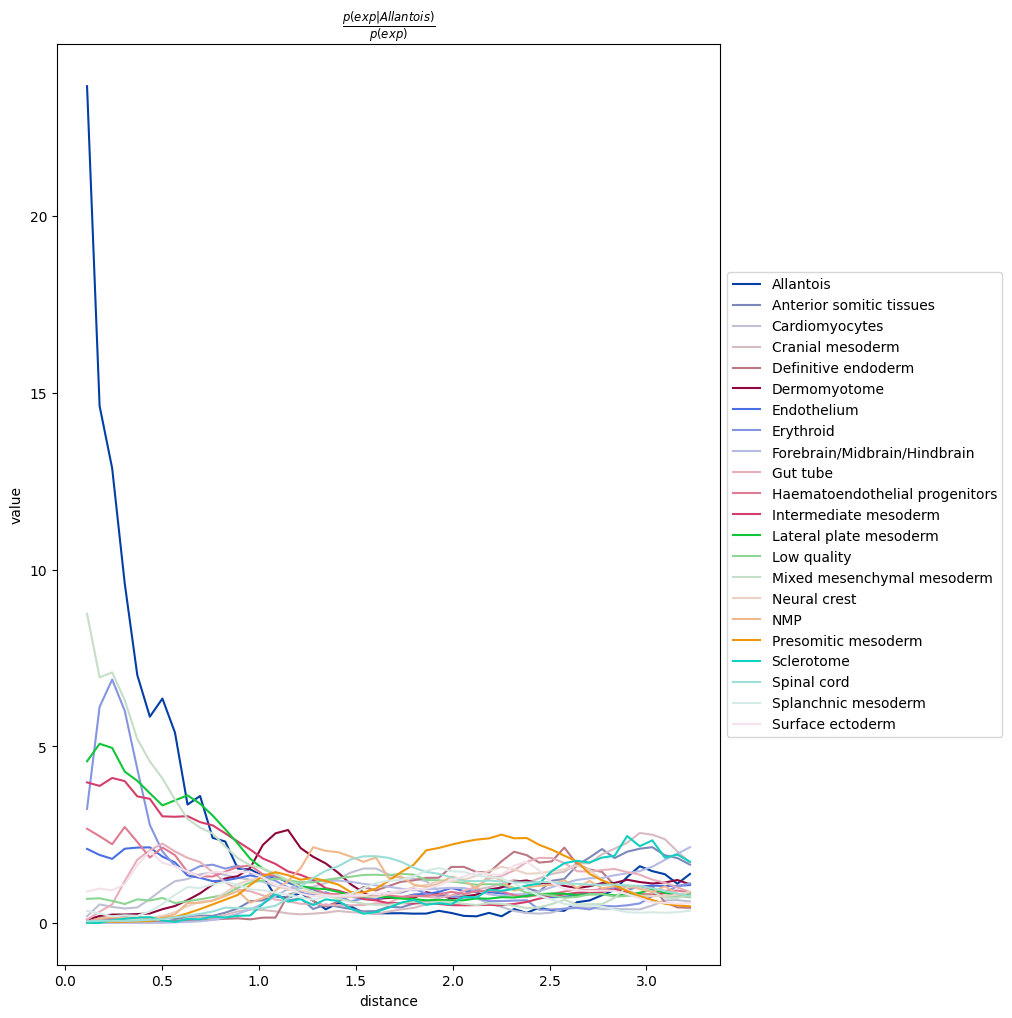

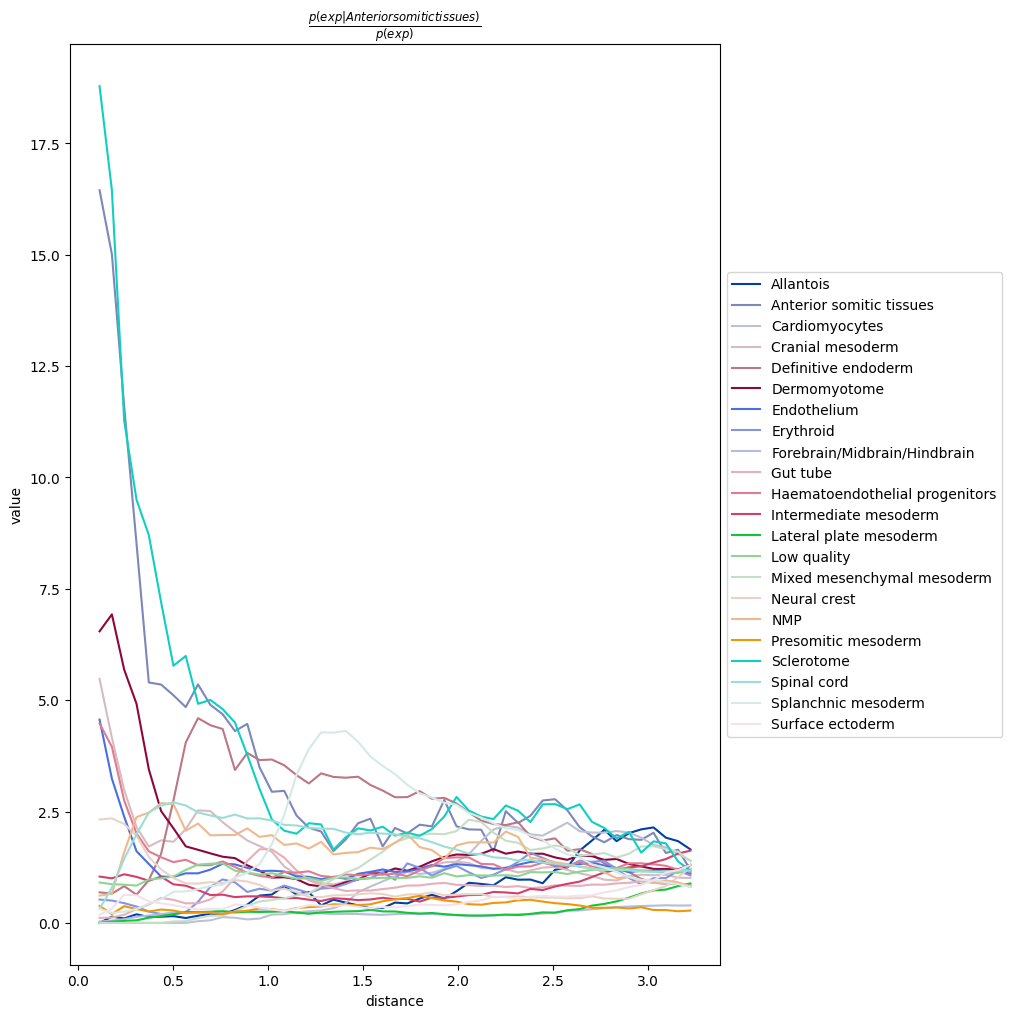

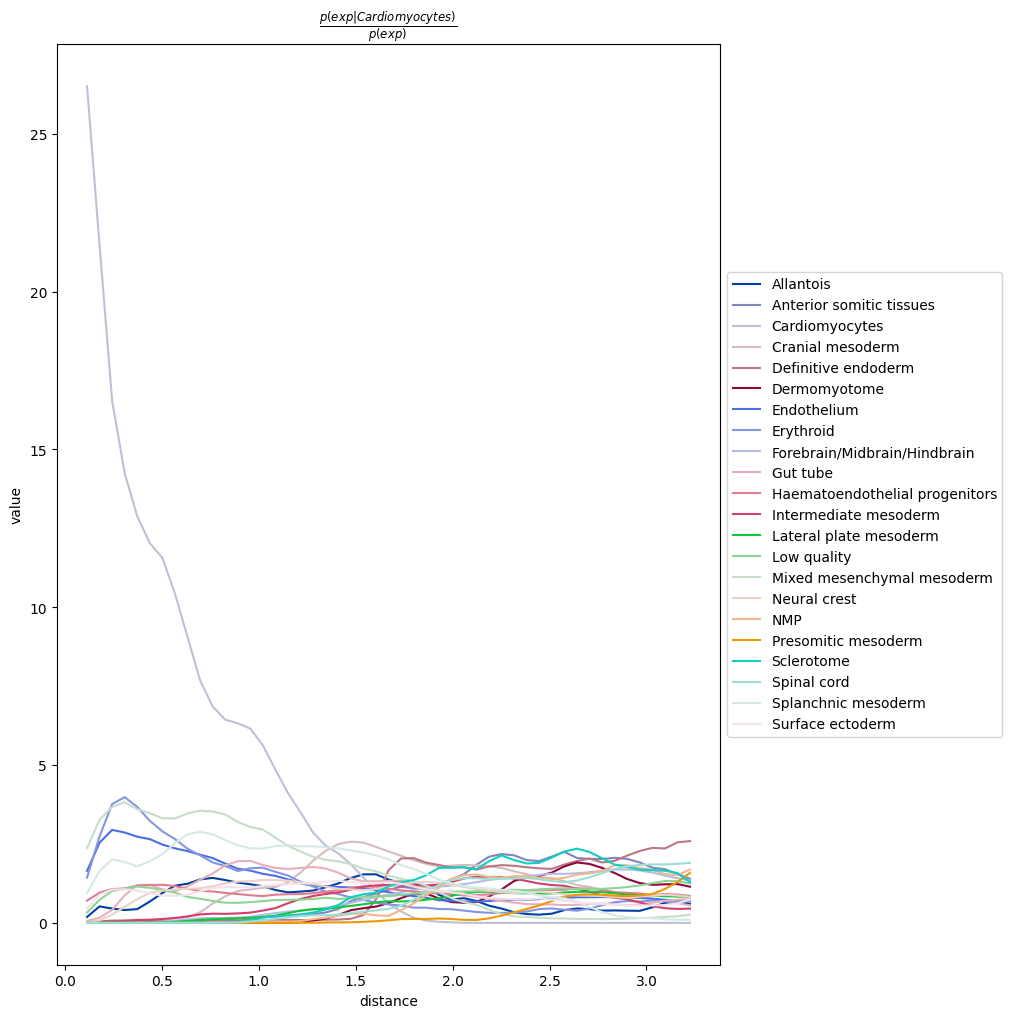

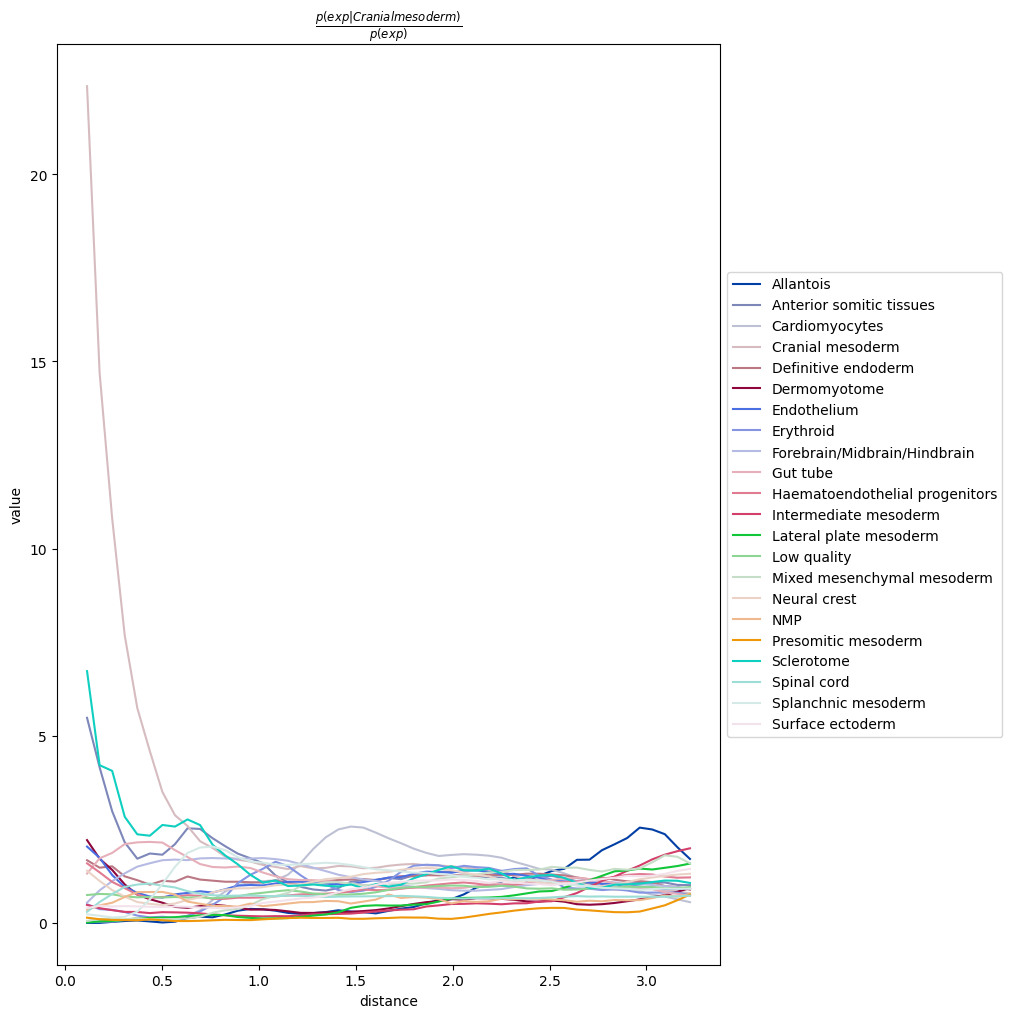

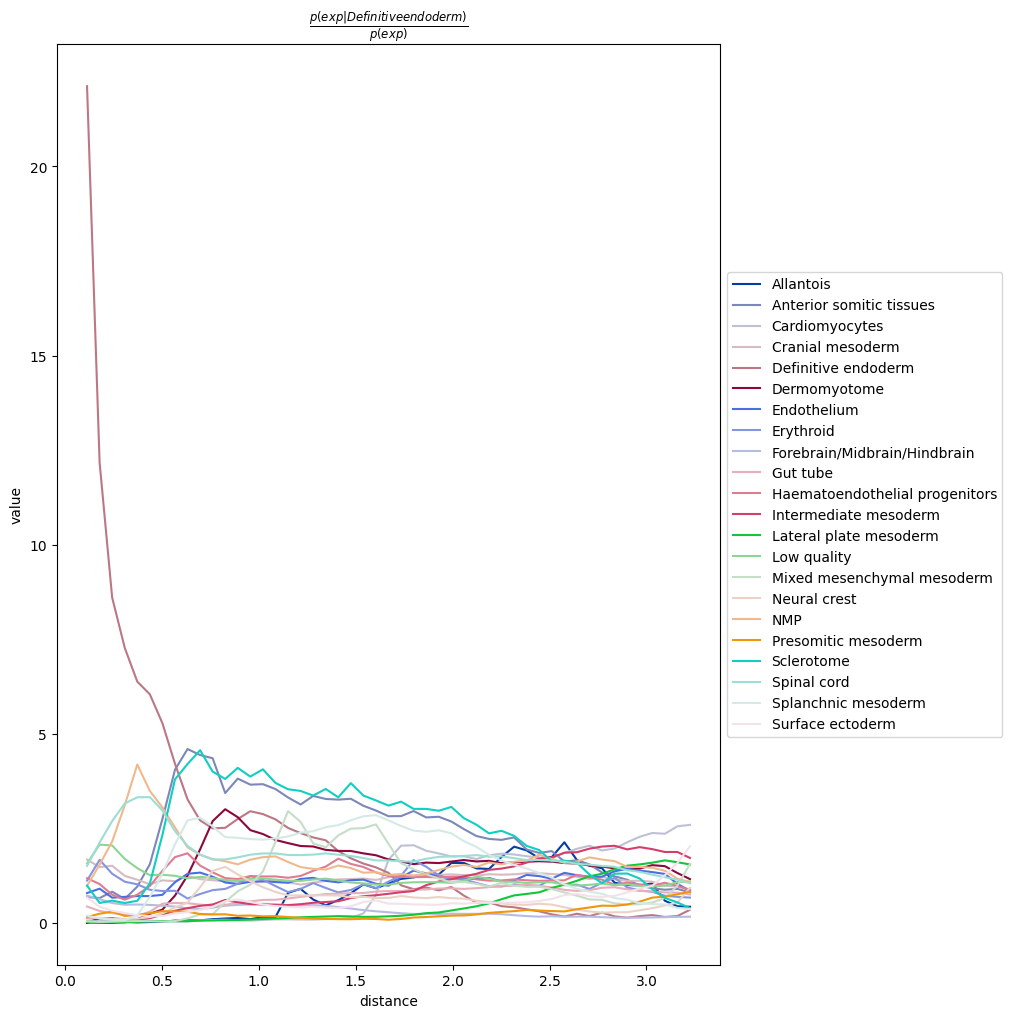

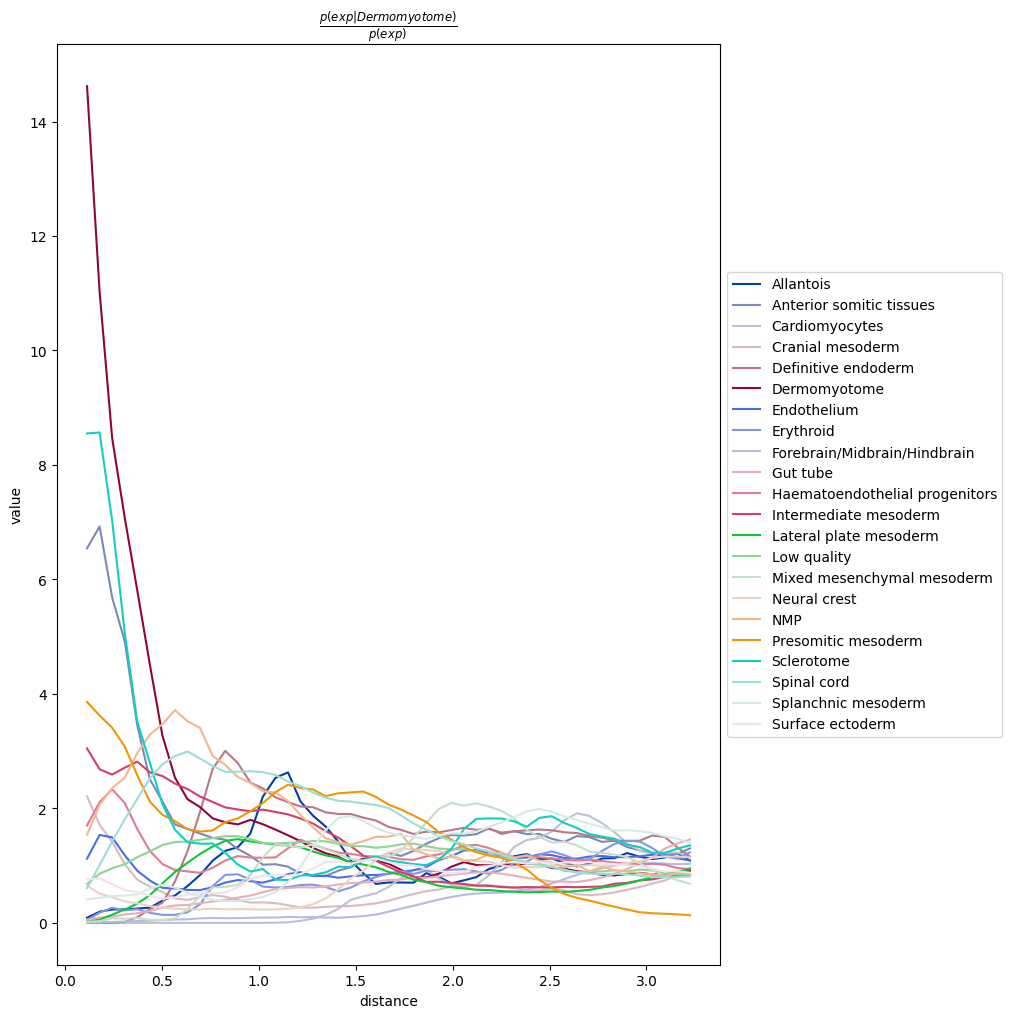

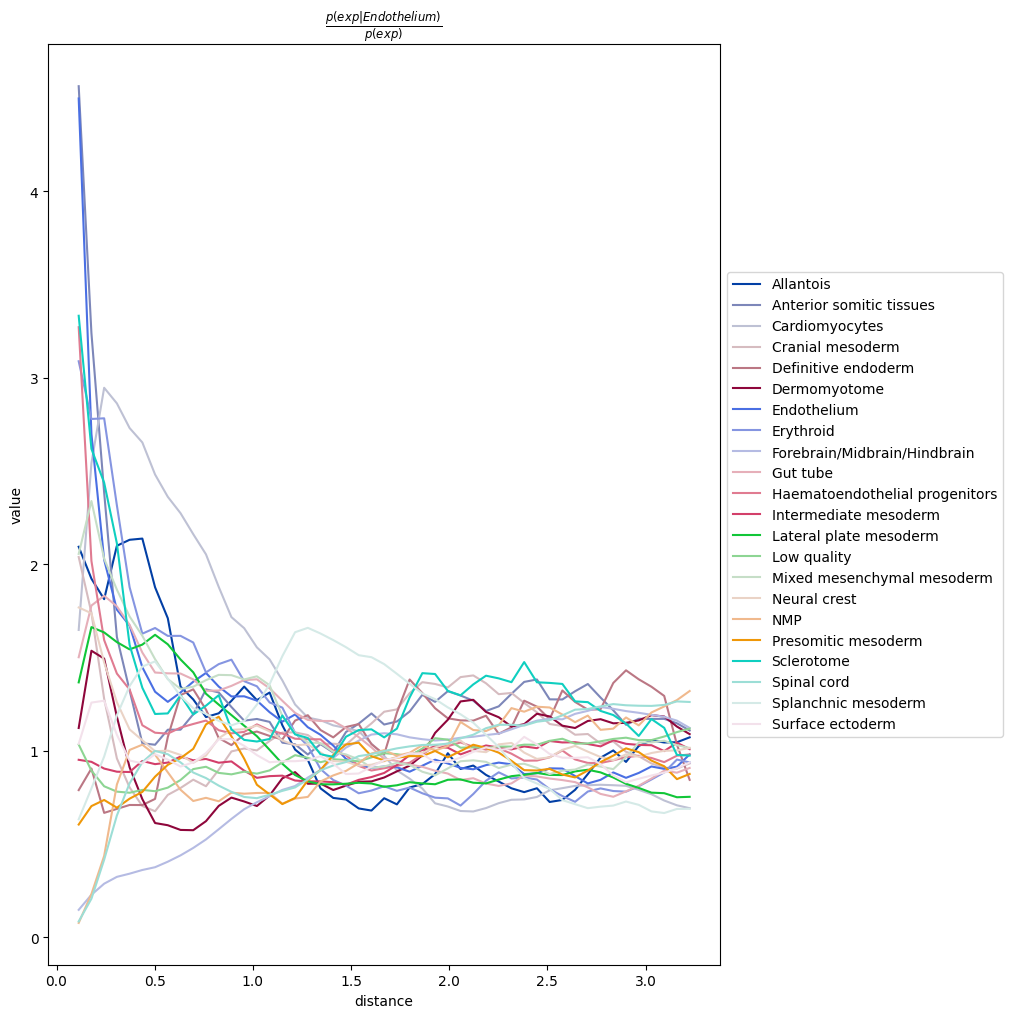

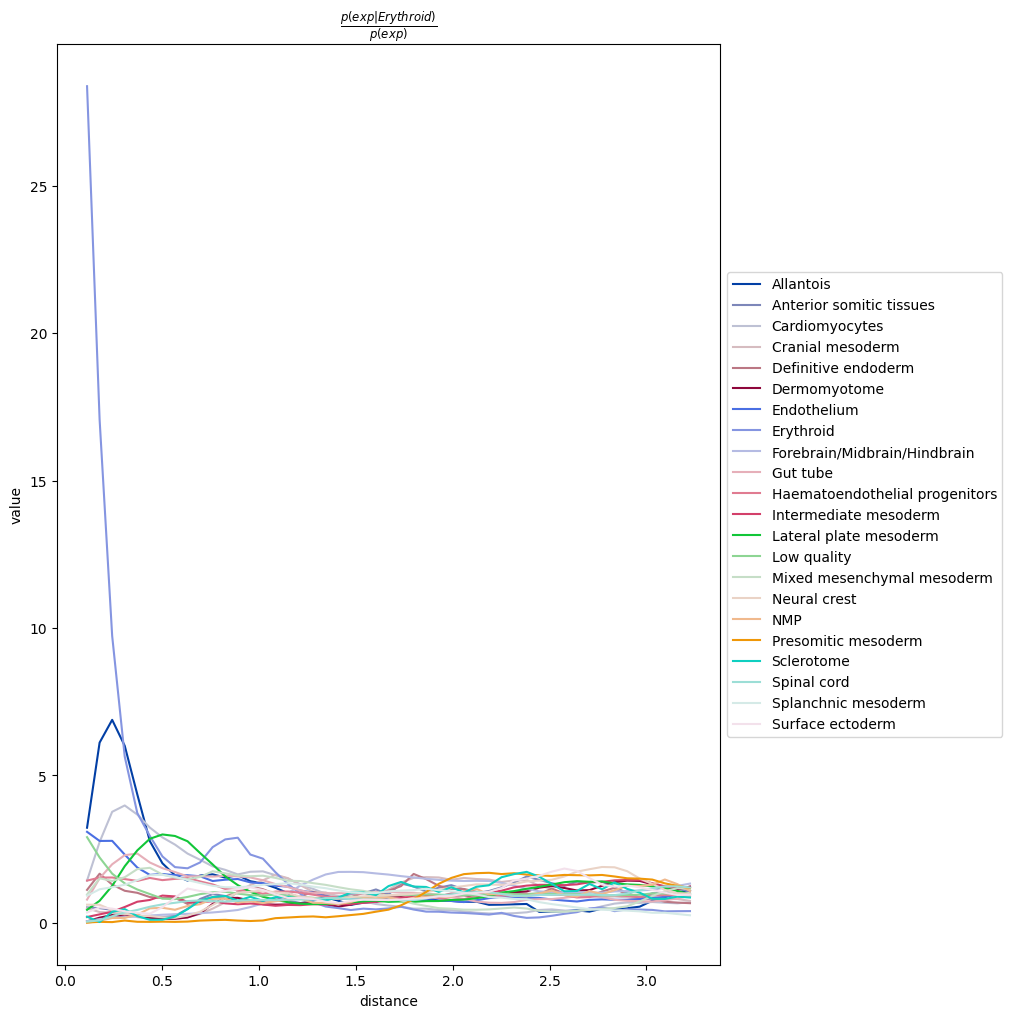

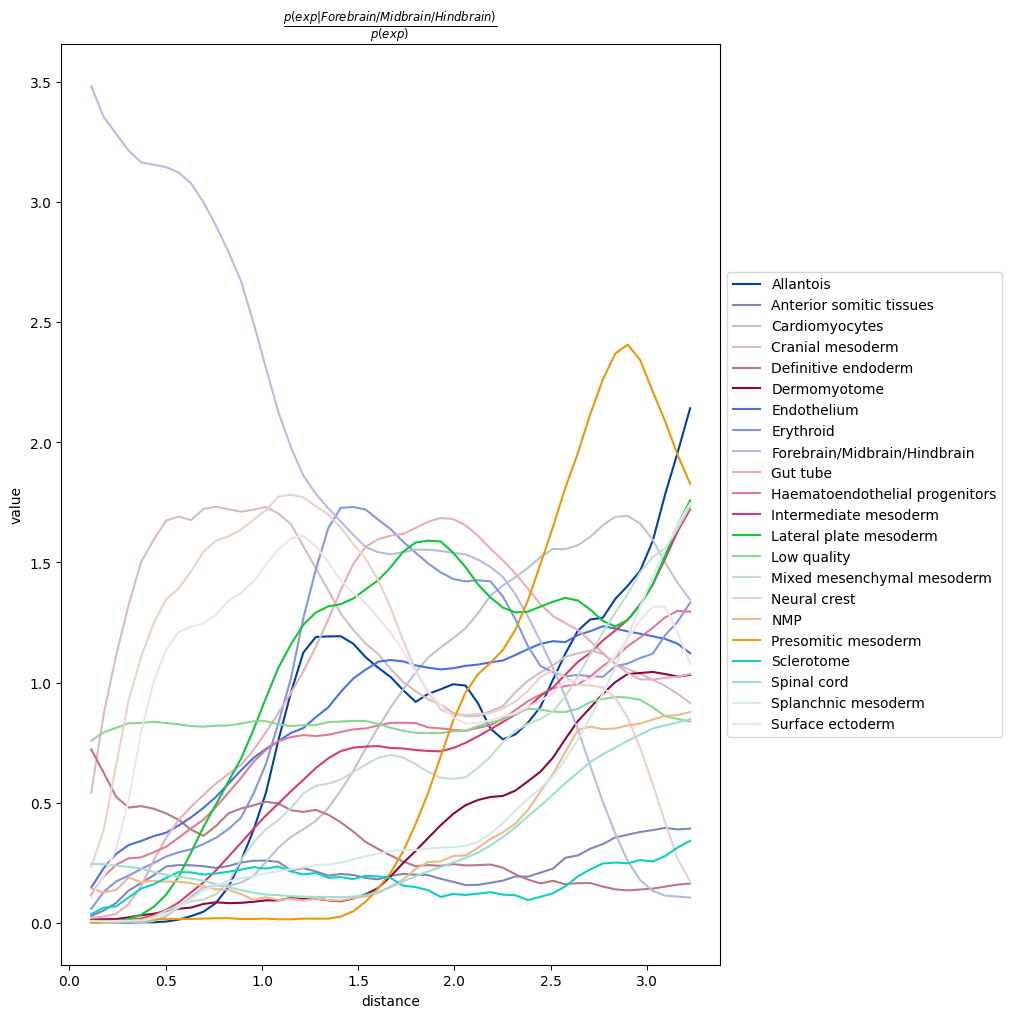

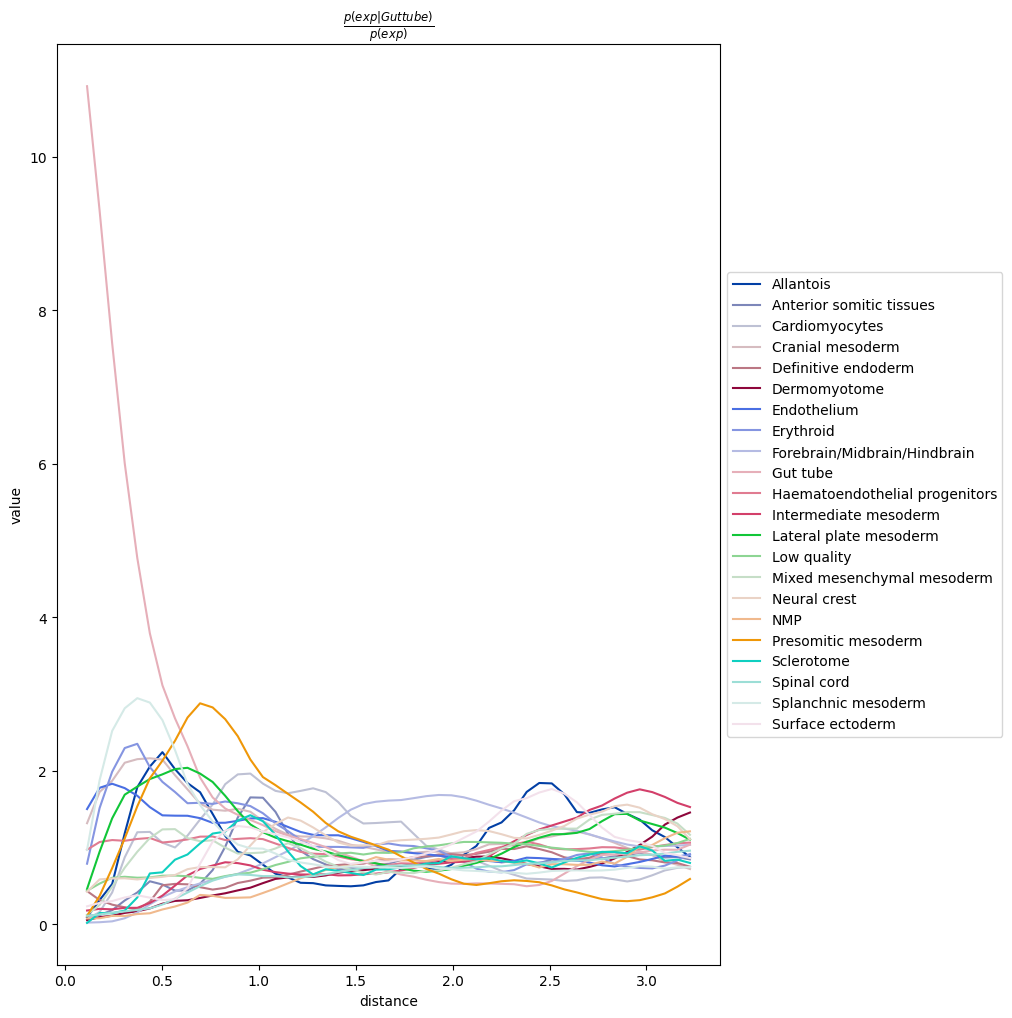

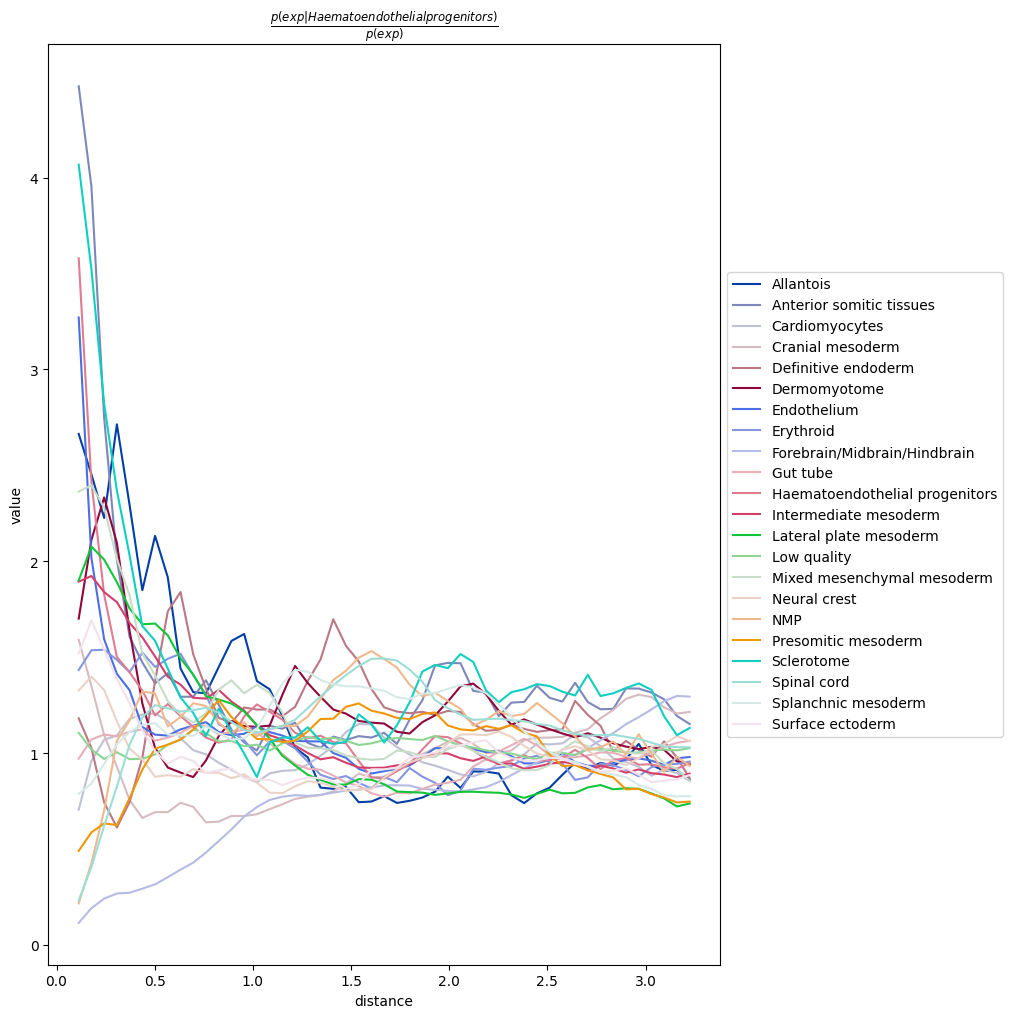

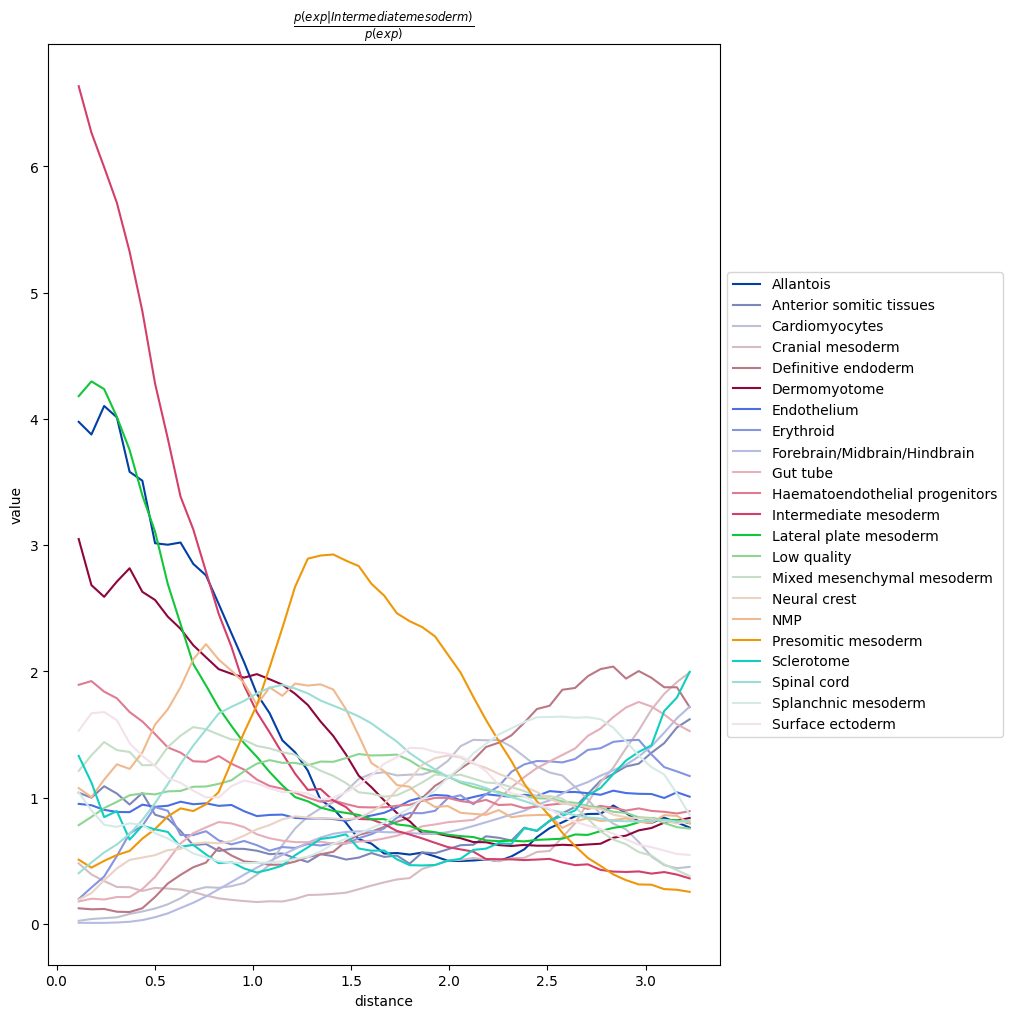

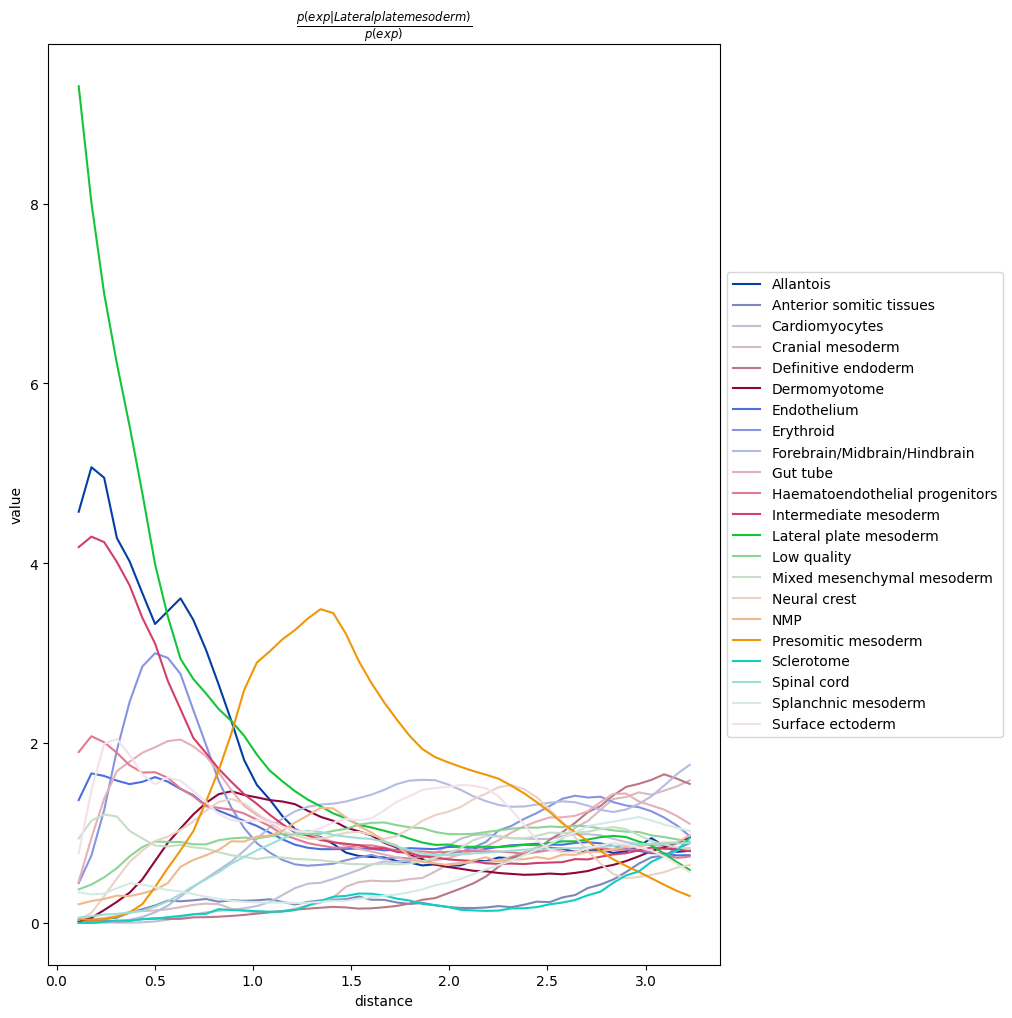

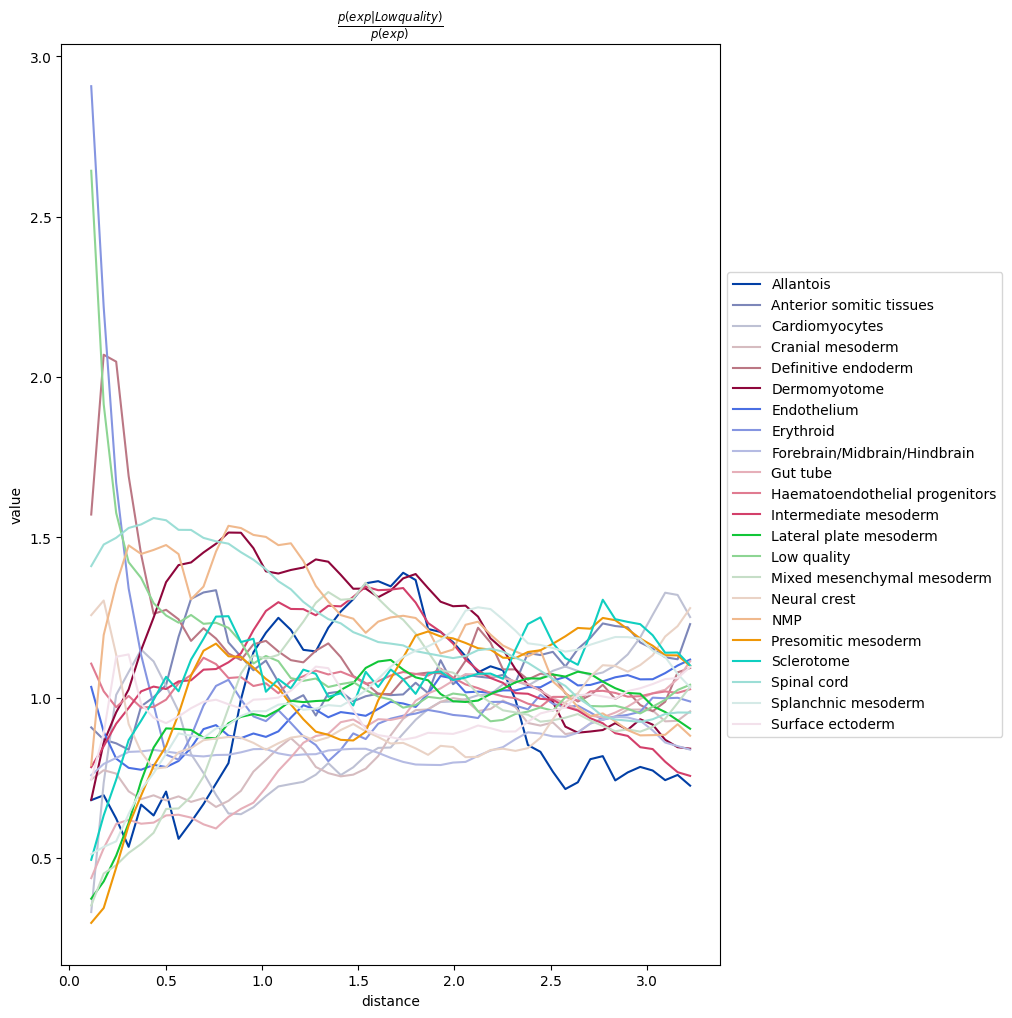

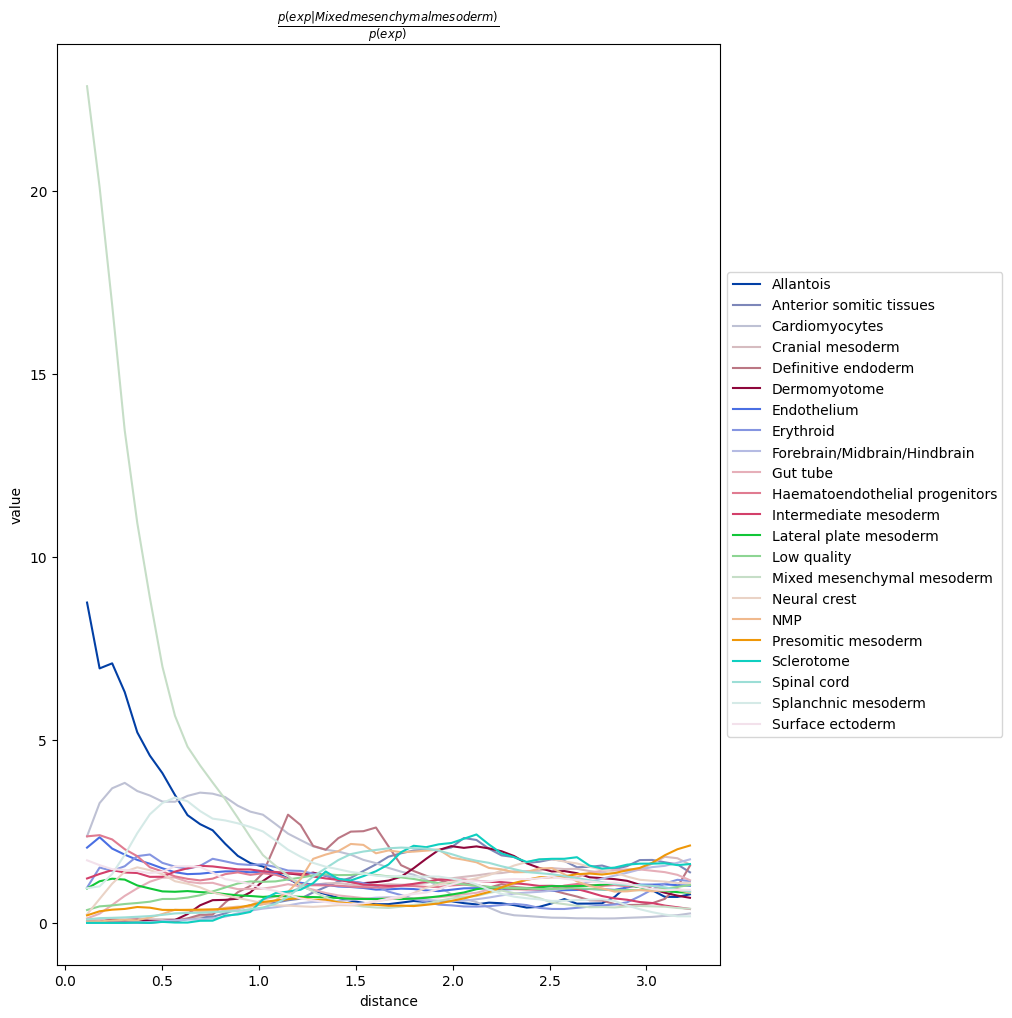

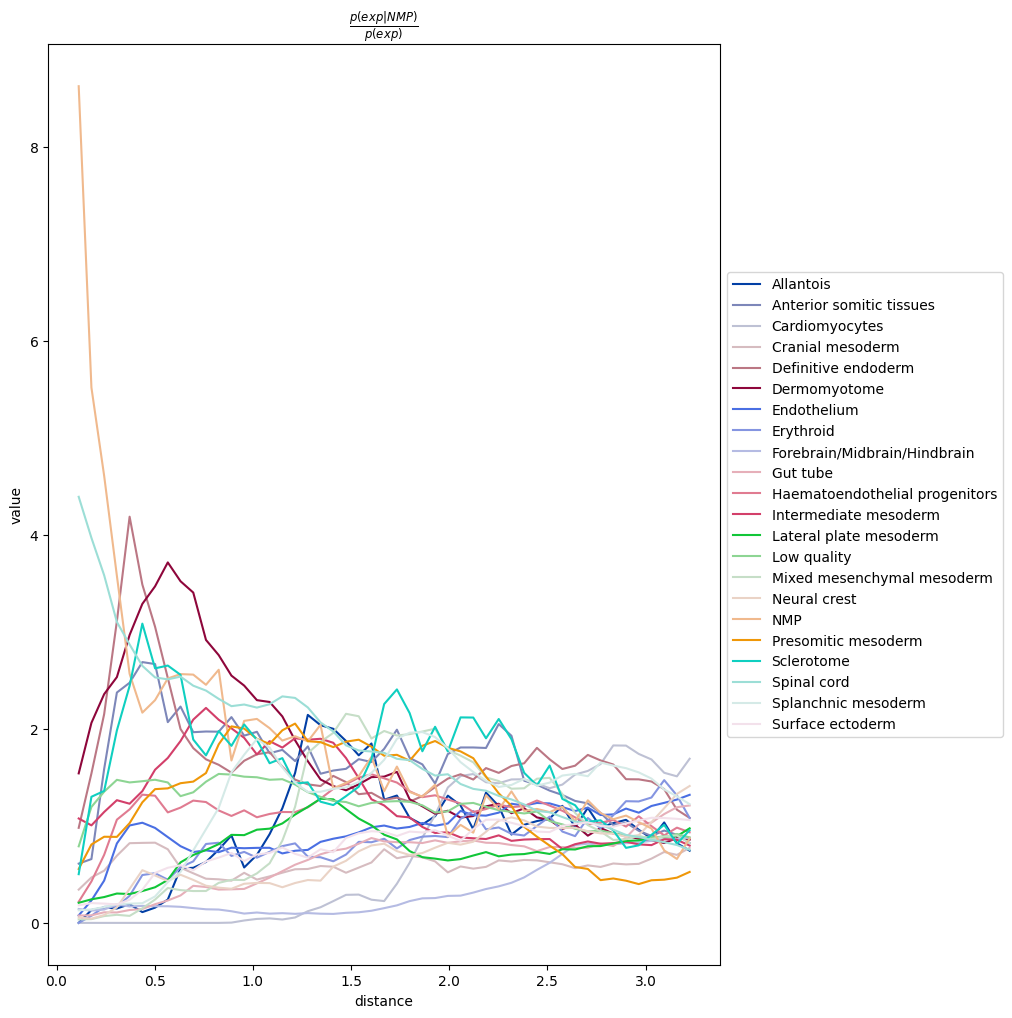

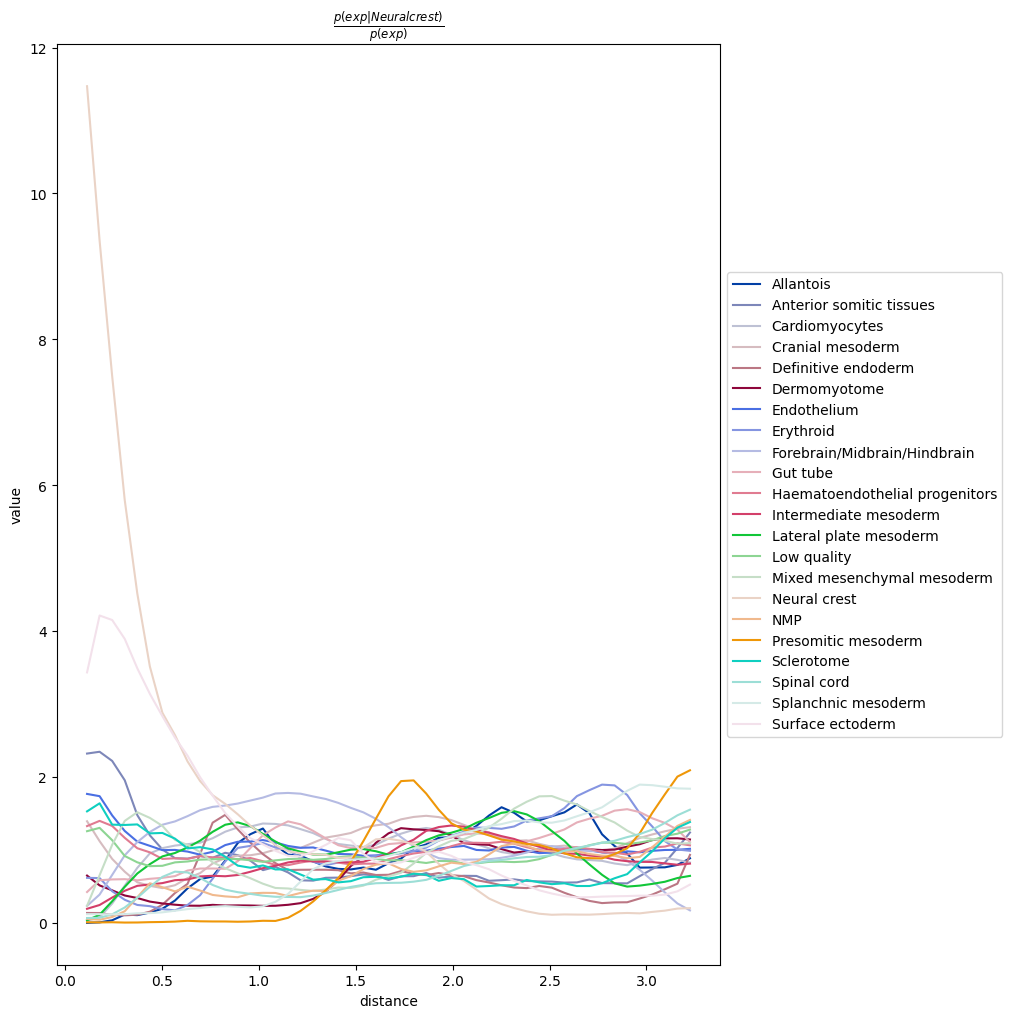

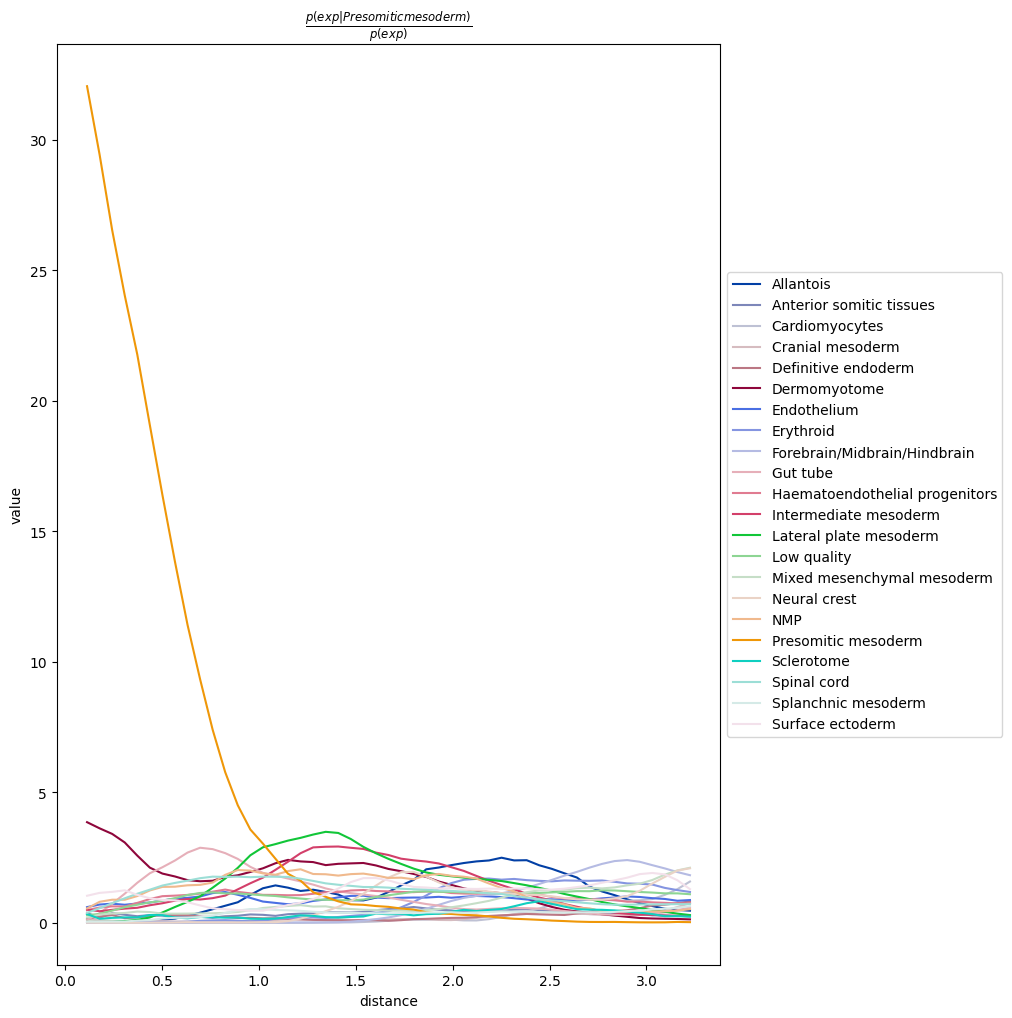

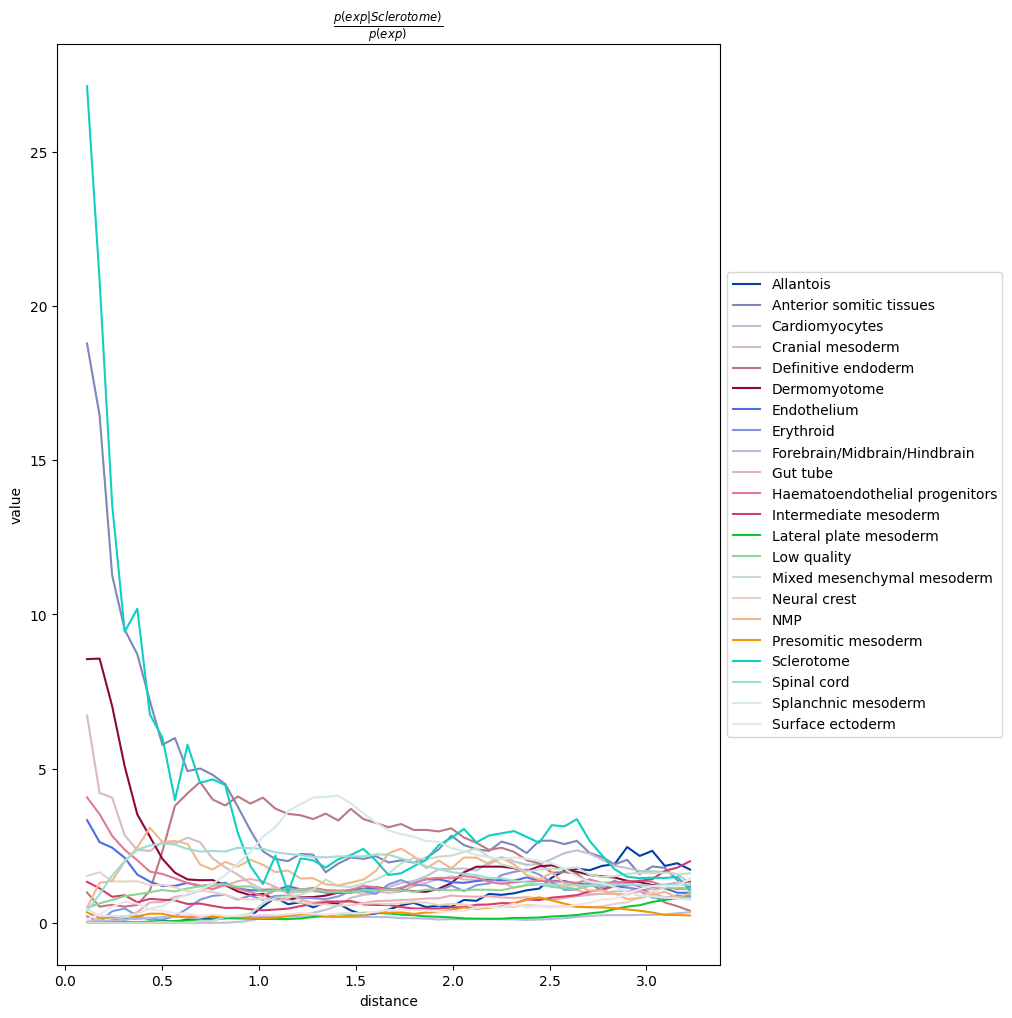

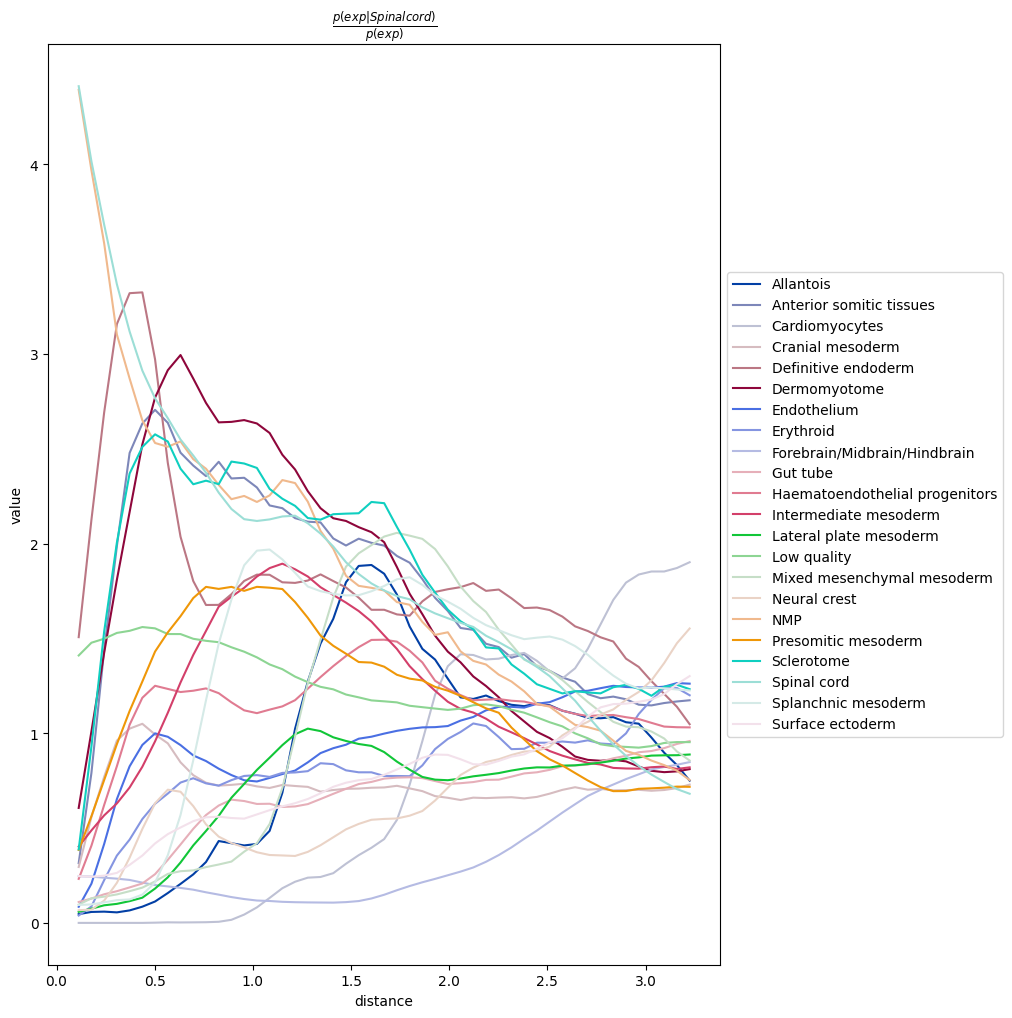

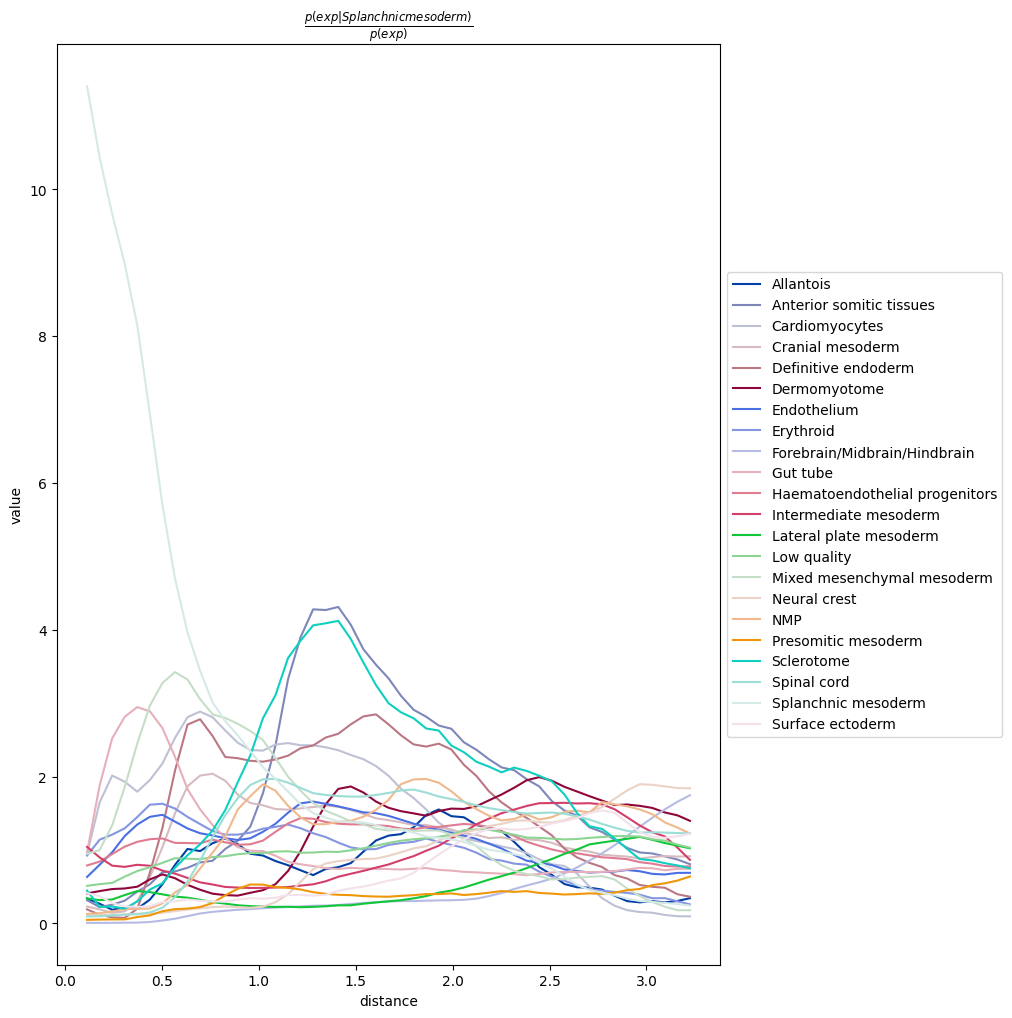

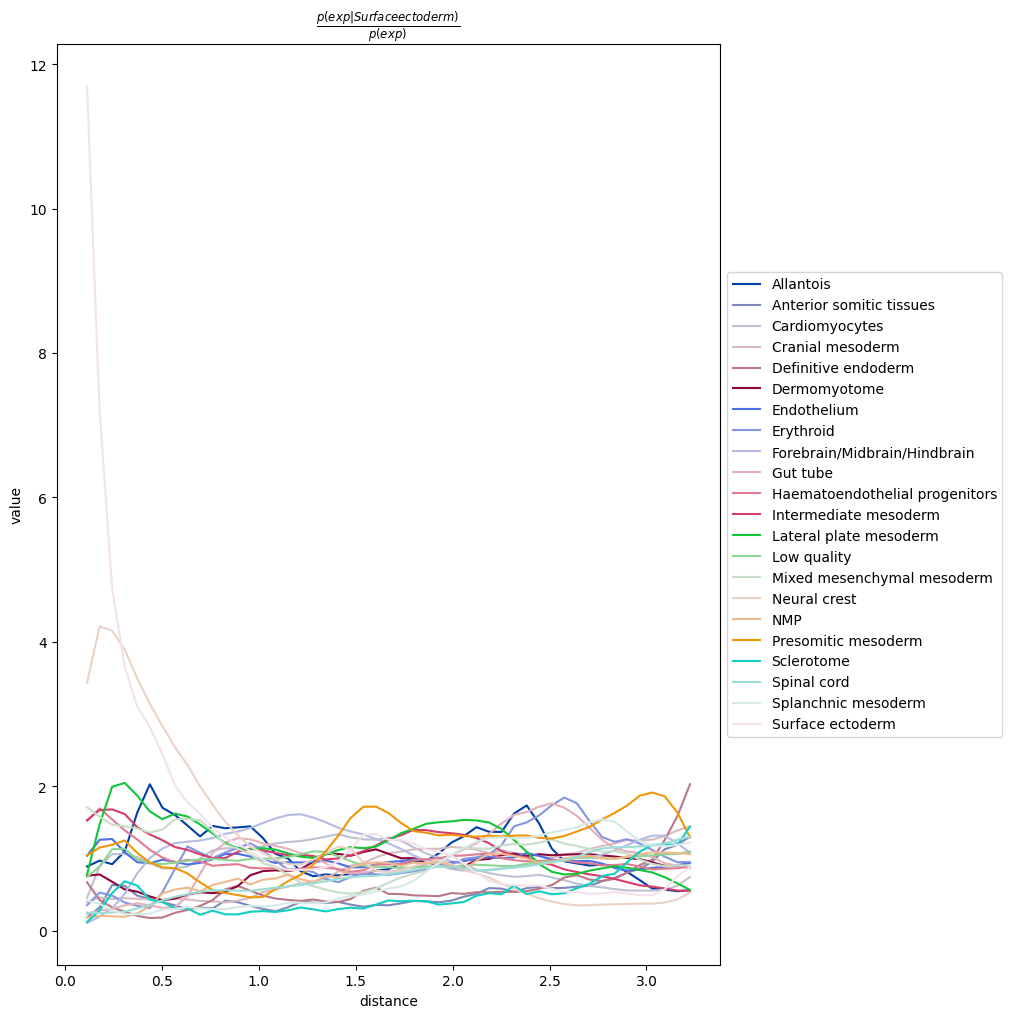

In [24]:
for ct in np.unique(adata.obs["celltype_mapped_refined"]):
    sq.pl.co_occurrence(adata, cluster_key="celltype_mapped_refined", clusters=ct,
                        save="/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/plots/squidpy/seqfish.co_occurance.{}.pdf".format(ct),
                       figsize=(10,10))